In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('players_22.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_12036\2349146801.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('players_22.csv')


In [4]:
data.head(2)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png


In [5]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [6]:
# list of features use to form clusters
features=['overall','potential','wage_eur','age']

In [7]:
# dropping missing values in selected features
data=data.dropna(subset=features)

In [8]:
# creating new data frame in which sepcific features's data is present
players=data[features].copy()

In [9]:
players.describe()

,overall,potential,wage_eur,age
count,19178.000000,19178.000000,19178.000000,19178.000000
mean,65.760246,71.076442,9017.989363,25.201168
std,6.882432,6.089398,19470.176724,4.746183
min,47.000000,49.000000,500.000000,16.000000
25%,61.000000,67.000000,1000.000000,21.000000
50%,66.000000,71.000000,3000.000000,25.000000
75%,70.000000,75.000000,8000.000000,29.000000
max,93.000000,95.000000,350000.000000,54.000000


In [10]:
# scaling data 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
players=scaler.fit_transform(players)

In [11]:
players_scaled = pd.DataFrame(players, columns=['overall','potential','wage_eur','age'])

In [12]:
players_scaled.describe()

,overall,potential,wage_eur,age
count,19178.000000,19178.000000,19178.000000,19178.000000
mean,0.407831,0.479923,0.024372,0.242136
std,0.149618,0.132378,0.055709,0.124900
min,0.000000,0.000000,0.000000,0.000000
25%,0.304348,0.391304,0.001431,0.131579
50%,0.413043,0.478261,0.007153,0.236842
75%,0.500000,0.565217,0.021459,0.342105
max,1.000000,1.000000,1.000000,1.000000


In [13]:
#using wcss to know clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(players_scaled)
    wcss.append(km.inertia_)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_k

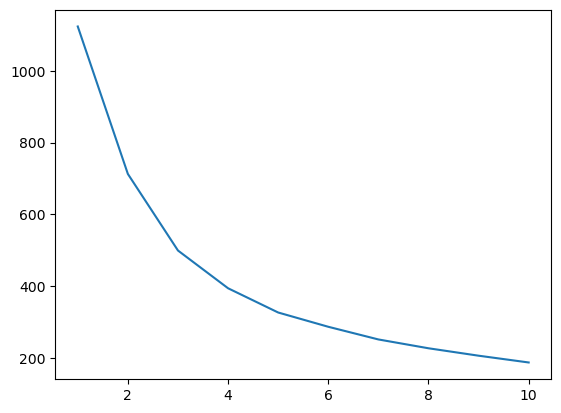

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), wcss)

In [15]:
km=KMeans(n_clusters=3)
y_means=km.fit_predict(players_scaled)
y_means

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 0, 0, 0])

In [16]:
#6931 records goes into cluster 1
players_scaled[y_means==0].shape

(6931, 4)

In [17]:
#5717 records goes into cluster 1
players_scaled[y_means==1].shape

(5717, 4)

In [18]:
#6530 records goes into cluster 1
players_scaled[y_means==2].shape

(6530, 4)

In [19]:
# Apply PCA to reduce to 2 dimensions for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
players_pca = pca.fit_transform(players_scaled)

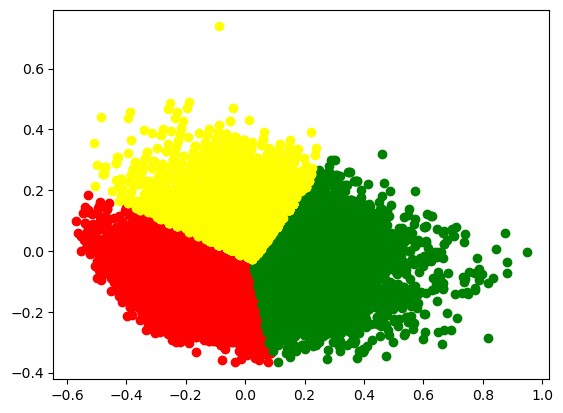

In [20]:
plt.scatter(players_pca[y_means==0,0], players_pca[y_means==0,1], color='red')
plt.scatter(players_pca[y_means==1,0], players_pca[y_means==1,1], color='green')
plt.scatter(players_pca[y_means==2,0], players_pca[y_means==2,1], color='yellow')


In [21]:
players_scaled[y_means==0]

,overall,potential,wage_eur,age
5929,0.478261,0.434783,0.015737,0.131579
5933,0.478261,0.434783,0.015737,0.131579
5939,0.478261,0.434783,0.012876,0.131579
5942,0.478261,0.434783,0.015737,0.131579
6987,0.456522,0.413043,0.018598,0.131579
...,...,...,...,...
19173,0.000000,0.065217,0.001431,0.157895
19174,0.000000,0.217391,0.000000,0.078947
19175,0.000000,0.130435,0.000000,0.131579
19176,0.000000,0.239130,0.000000,0.078947


In [29]:
players_scaled[y_means==1]

,overall,potential,wage_eur,age
0,1.000000,0.956522,0.914163,0.473684
1,0.978261,0.934783,0.771102,0.421053
2,0.956522,0.913043,0.771102,0.526316
3,0.956522,0.913043,0.771102,0.342105
4,0.956522,0.913043,1.000000,0.368421
...,...,...,...,...
10973,0.391304,0.760870,0.001144,0.052632
10975,0.391304,0.717391,0.000000,0.078947
11999,0.369565,0.760870,0.038627,0.078947
12039,0.369565,0.782609,0.024320,0.052632


In [30]:
players_scaled[y_means==2]

,overall,potential,wage_eur,age
2417,0.565217,0.521739,0.027182,0.631579
2419,0.565217,0.521739,0.021459,0.526316
2420,0.565217,0.521739,0.010014,0.552632
2421,0.565217,0.521739,0.044349,0.526316
2422,0.565217,0.521739,0.015737,0.526316
...,...,...,...,...
18910,0.086957,0.043478,0.000000,0.342105
18971,0.065217,0.021739,0.004292,0.342105
19039,0.043478,0.000000,0.000000,0.526316
19057,0.043478,0.000000,0.004292,0.421053
